<a href="https://colab.research.google.com/github/Pankaj-2003/Fraudulent_Transaction_Detection/blob/main/fraud_transaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**For Question and answers please go to the bottom of the notebook**

In [1]:
import pandas as pd
import numpy as np
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [2]:
!kaggle datasets download -d peatea/fraudlent-transactions # i uploaded the dataset to kaggle , then i used kaggle api command to download it here

Dataset URL: https://www.kaggle.com/datasets/peatea/fraudlent-transactions
License(s): apache-2.0
 96% 171M/178M [00:02<00:00, 105MB/s]
100% 178M/178M [00:02<00:00, 85.7MB/s]


In [3]:
!unzip \*.zip && rm \*.zip

Archive:  fraudlent-transactions.zip
  inflating: Fraud.csv               
rm: cannot remove '*.zip': No such file or directory


In [43]:
train = pd.read_csv("Fraud.csv")

In [26]:
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# basic exploration
train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
train.dtypes


,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [ ]:
train.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


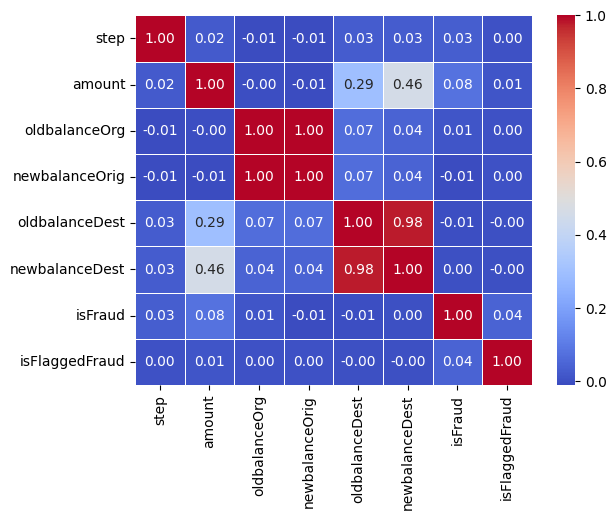

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = train.drop(["type" ,"nameOrig" , "nameDest" ] , axis = 1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

# new balance and old balance are highly correlated

In [ ]:
train[train["nameDest"].str.startswith("M") & train["isFraud"] == 1]
train[(train["isFraud"] == 1)]
train["isFraud"].value_counts()
train["isFlaggedFraud"].value_counts()
train[train["isFlaggedFraud"] ==1]

,count
isFraud,
0,6354407
1,8213


<Axes: xlabel='newbalanceDest', ylabel='oldbalanceDest'>

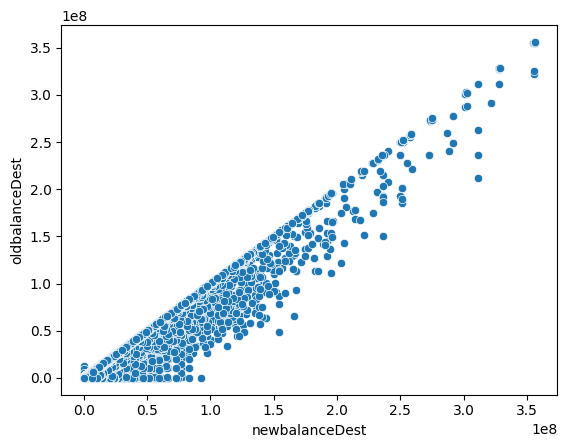

In [ ]:
sns.scatterplot(x = "newbalanceDest", y = "oldbalanceDest",data = train)

In [44]:
# removing the the rows where amount is 0
train = train[train["amount"] != 0]
train.shape

(6362604, 11)

In [45]:
# removing unwanted columns

train = train.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
train.shape

(6362604, 9)

In [9]:
# checking the types where isfraud is true
train[train["isFraud"] == 1]["type"].value_counts()

,count
type,
CASH_OUT,4100
TRANSFER,4097


In [46]:
# so other types are of use but not that much , what i mean is , we can use these two types of training and we know that other types are not fraud and after training we will mark them non fraud.
filtered_data = train[(train["type"] == "CASH_OUT") | (train["type"] == "TRANSFER")]
filtered_data


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


In [47]:
# Define features (X) and target variable (y)
X = filtered_data.drop(columns=['isFraud'])
y = filtered_data['isFraud']

In [48]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,0
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,0


In [49]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [50]:
# encoding after train test split to avoid data leakage
X_train_encoded = pd.get_dummies(X_train, columns=['type'] )
X_test_encoded = pd.get_dummies(X_test, columns=['type'] )

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.97      0.79      0.87      2459

    accuracy                           1.00    831118
   macro avg       0.99      0.90      0.94    831118
weighted avg       1.00      1.00      1.00    831118

